<a href="https://colab.research.google.com/github/a33211/Data-science-homeworks/blob/main/Working_copy_Homework_9_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from keras import utils
import sklearn


In [38]:
from sklearn.metrics import classification_report

Так як це теж зображення, скопіював для початку частину налаштувань з ДЗ8

In [39]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
#class names
class_names = ['майка', 'штані', 'світер', 'плаття', 'толстовка', 'сандалі', 'сорочка', 'кросівки', 'сумка', 'жіночі краги']

In [40]:
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

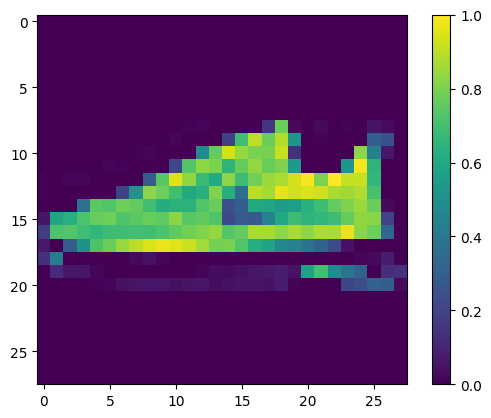

In [41]:
plt.figure()
plt.imshow(x_train[690])
plt.colorbar()
plt.grid(False)

TypeError: ignored

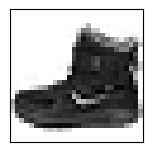

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

Побудова модоелі

In [61]:
from tensorflow.keras import regularizers

In [91]:
model2 = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          layers.Dense(512, activation="relu"),
                          layers.Dense(256, activation="relu"),
                          layers.Dense(128, activation="relu"),
                          layers.Dense(10, activation="softmax")
])


In [92]:
model2.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
display(model2.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 512)               401920    
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


None

Треннування моделі

In [93]:
model2.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4777 - accuracy: 0.8264
Epoch 2/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3616 - accuracy: 0.8678
Epoch 3/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3265 - accuracy: 0.8795
Epoch 4/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3037 - accuracy: 0.8867
Epoch 5/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2843 - accuracy: 0.8932
Epoch 6/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2684 - accuracy: 0.8997
Epoch 7/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2563 - accuracy: 0.9038
Epoch 8/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2455 - accuracy: 0.9073
Epoch 9/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2371 - accuracy: 0.9102
Epoch 10/100
1875/1875 [==============================]

In [95]:
#тестування
y_pred = model2.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), y_pred_labels)
print(report)

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.92      0.87      0.90      1000
           4       0.78      0.84      0.81      1000
           5       0.99      0.95      0.97      1000
           6       0.74      0.71      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [97]:
#прогноз
predict=model2.predict(x_train)

1875/1875 [==============================] - 7s 4ms/step


майка


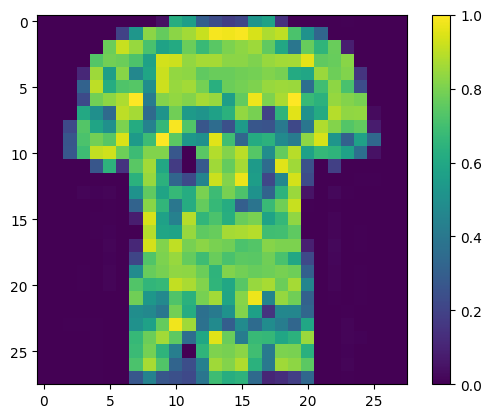

In [100]:
plt.figure()
plt.imshow(x_test[400])
plt.colorbar()
plt.grid(False)
print(class_names[np.argmax(y_test[400])])